In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


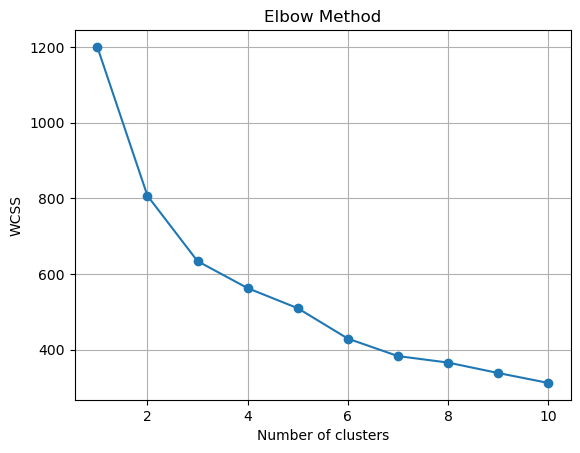

📊 Cluster Summary:
                Age  Annual Income (k$)  Spending Score (1-100)  Income_per_Age
Cluster                                                                       
0        57.977273           49.795455               40.113636        0.875050
1        26.204545           72.386364               57.568182        2.819370
2        27.000000           28.194444               64.194444        1.072762
3        44.647059           68.705882               30.901961        1.572575
4        32.680000           88.680000               74.200000        2.758234


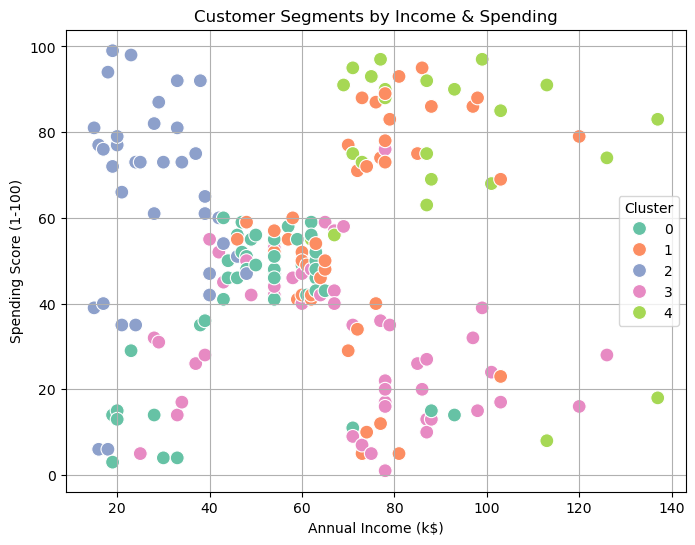

In [2]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🔹 Step 1: Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# 🔹 Step 2: Encode Gender
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# 🔹 Step 3: Feature Engineering
data['Income_per_Age'] = data['Annual Income (k$)'] / data['Age']

# Optional: Create age groups for interpretation
data['Age_Group'] = pd.cut(data['Age'],
                           bins=[15, 25, 35, 50, 70],
                           labels=["Teen", "Young Adult", "Adult", "Senior"])
data['Age_Group_Code'] = data['Age_Group'].map({
    "Teen": 0, "Young Adult": 1, "Adult": 2, "Senior": 3
})

# 🔹 Step 4: Prepare features for clustering
features = ['Gender', 'Age', 'Annual Income (k$)',
            'Spending Score (1-100)', 'Income_per_Age', 'Age_Group_Code']
X = data[features].fillna(0)

# 🔹 Step 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Step 6: Elbow method to determine optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 🔹 Step 7: Train KMeans model (say, k=5 based on elbow)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# 🔹 Step 8: Cluster Summary
cluster_summary = data.groupby("Cluster")[['Age', 'Annual Income (k$)', 
                                           'Spending Score (1-100)', 
                                           'Income_per_Age']].mean()
print("📊 Cluster Summary:\n", cluster_summary)

# 🔹 Step 9: 2D Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Cluster',
                palette='Set2',
                s=100)
plt.title("Customer Segments by Income & Spending")
plt.grid(True)
plt.show()
